## 1) Завантажити дані, вивести назви колонок і розмір датасета

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Frogs_MFCCs.csv")

In [3]:
print(f"Розмір датасета: {df.shape}")
print(f"Назви колонок: {df.columns.tolist()}")

Розмір датасета: (7195, 26)
Назви колонок: ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus', 'Species', 'RecordID']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

## 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [5]:
print(f"Пропуски до очищення:\n{df.isnull().sum()}")

Пропуски до очищення:
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


In [6]:
# видаляємо колонку ID, вона не потрібна для навчання
df = df.drop('RecordID', axis=1)

## 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [8]:
# створюємо тимчасовий датафрейм для візуалізації
df_viz = df.copy()

In [9]:
# для класифікації виберемо одну цільову змінну, наприклад 'Family'
target_col = 'Family'

In [10]:
# кодуємо текстову цільову змінну в числа, щоб порахувати кореляцію
le_viz = LabelEncoder()
df_viz['target_encoded'] = le_viz.fit_transform(df_viz[target_col])

In [11]:
# вибираємо тільки числові колонки
num_cols = df.select_dtypes(include=[np.number]).columns

In [12]:
# вибираємо числові колонки + нашу закодовану цільову змінну
cols_for_corr = num_cols.tolist() + ['target_encoded']

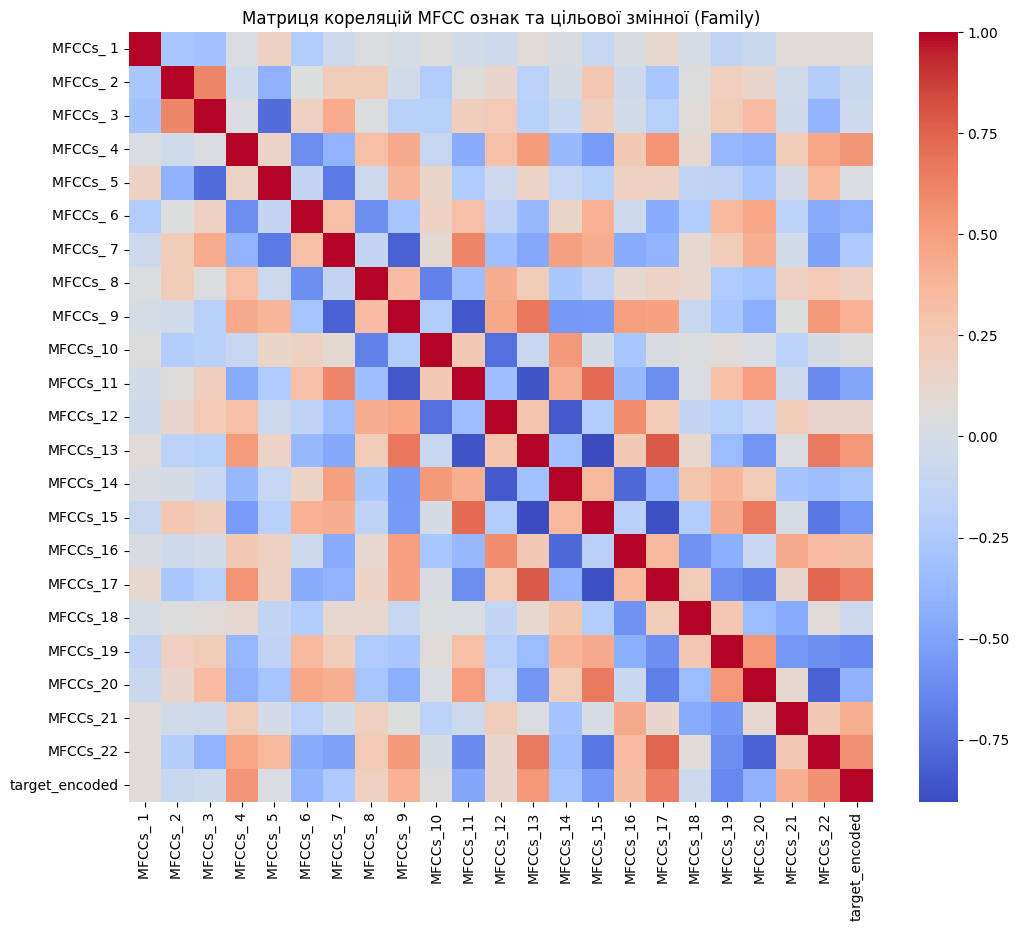

In [13]:
# correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df_viz[cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title(f"Матриця кореляцій MFCC ознак та цільової змінної ({target_col})")
plt.show()

In [14]:
# виведемо топ-5 ознак, які найбільше корелюють з цільовою змінною
target_corr = corr_matrix['target_encoded'].abs().sort_values(ascending=False)
print(f"\nТоп кореляцій з {target_col}:")
print(target_corr[1:6]) # пропускаємо саму цільову змінну (index 0)


Топ кореляцій з Family:
MFCCs_17    0.638747
MFCCs_19    0.629755
MFCCs_22    0.557251
MFCCs_15    0.551621
MFCCs_ 4    0.542243
Name: target_encoded, dtype: float64


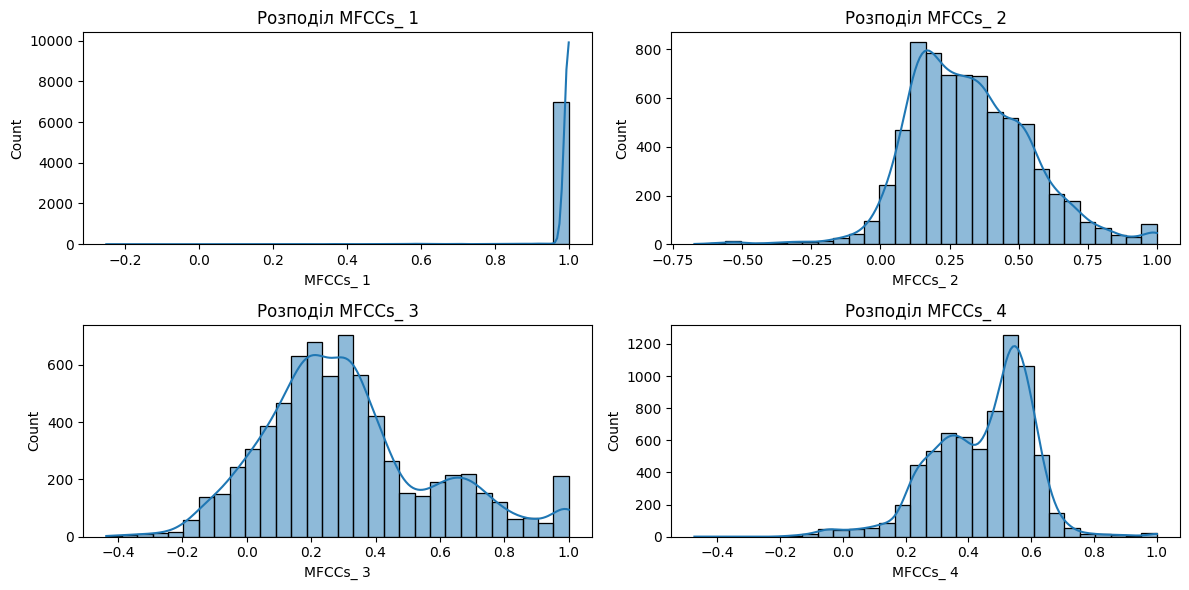

In [15]:
# гістограми розподілу (для перших 4 ознак)
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Розподіл {col}')
plt.tight_layout()
plt.show()

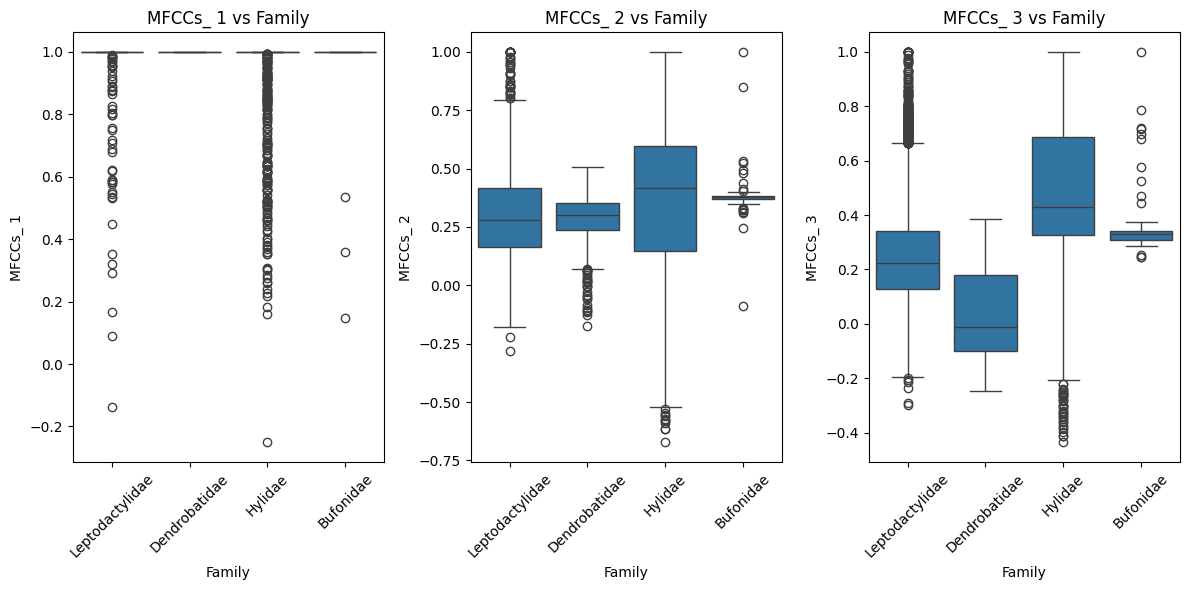

In [16]:
# boxplots відносно цільової змінної
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols[:3]): # перші 3 ознаки
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=target_col, y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs {target_col}')
plt.tight_layout()
plt.show()

## 4) Нормалізувати дані

In [17]:
# кодування цільової змінної (текст у числа)
le = LabelEncoder()
y = le.fit_transform(df[target_col])
X = df[num_cols]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# розбиття на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# нормалізація даних (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5) Провести навчання класифікаторів

In [22]:
models_results = {}

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
# kNN
print("Підбір параметрів для kNN")
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_
models_results['kNN'] = best_knn
print(f"Найкращий kNN: {knn_grid.best_params_}, Score: {knn_grid.best_score_:.3f}")

Підбір параметрів для kNN
Найкращий kNN: {'n_neighbors': 3}, Score: 0.987


In [25]:
# decision tree
dt = DecisionTreeClassifier(random_state=56)
dt.fit(X_train_scaled, y_train)
models_results['Decision Tree'] = dt

In [26]:
# SVM
print("Підбір параметрів для SVM")
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1]}
svc = SVC(random_state=56)
svc_grid = GridSearchCV(svc, svm_params, cv=3, scoring='accuracy')
svc_grid.fit(X_train_scaled, y_train)
best_svm = svc_grid.best_estimator_
models_results['SVM'] = best_svm
print(f"Найкращий SVM: {svc_grid.best_params_}, Score: {svc_grid.best_score_:.3f}")

Підбір параметрів для SVM
Найкращий SVM: {'C': 10, 'gamma': 'scale'}, Score: 0.992


In [27]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=56)
rf.fit(X_train_scaled, y_train)
models_results['Random Forest'] = rf

In [28]:
# AdaBoost
ada = AdaBoostClassifier(random_state=56)
ada.fit(X_train_scaled, y_train)
models_results['AdaBoost'] = ada

## 6) Серед обраних оптимальних моделей кожного класу вибрати найкращу

In [29]:
best_model_name = ""
best_accuracy = 0
best_model_instance = None

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
for name, model in models_results.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.3f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model_instance = model

print(f"----------------------------\nПереможець: {best_model_name} з точністю {best_accuracy:.3f}")

kNN: Accuracy = 0.994
Decision Tree: Accuracy = 0.968
SVM: Accuracy = 0.997
Random Forest: Accuracy = 0.990
AdaBoost: Accuracy = 0.912
----------------------------
Переможець: SVM з точністю 0.997


In [32]:
print(f"Звіт для {best_model_name}")
final_pred = best_model_instance.predict(X_test_scaled)
print(classification_report(y_test, final_pred, target_names=le.classes_))

Звіт для SVM
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.90      0.95        10
  Dendrobatidae       1.00      1.00      1.00       110
        Hylidae       0.99      1.00      1.00       446
Leptodactylidae       1.00      1.00      1.00       873

       accuracy                           1.00      1439
      macro avg       1.00      0.97      0.99      1439
   weighted avg       1.00      1.00      1.00      1439



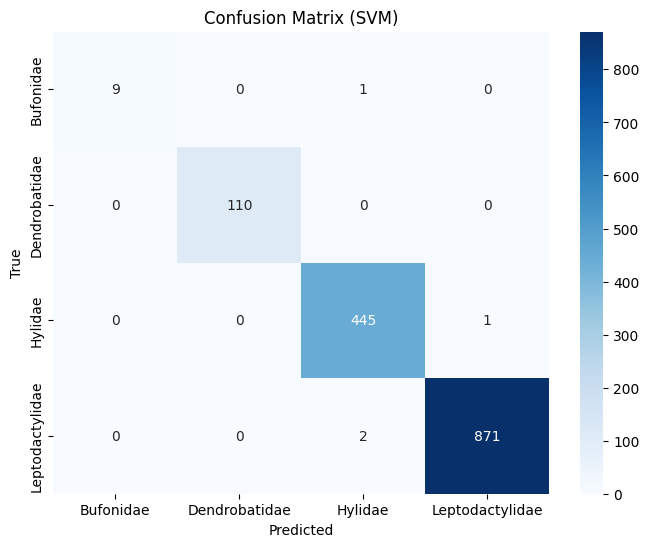

In [33]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()